<a href="https://colab.research.google.com/github/zaeyonz/Fish_distribution/blob/main/Stocastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SGDClassifier***

*   Stocastic Gradient Descent (확률적 경사 하강법)

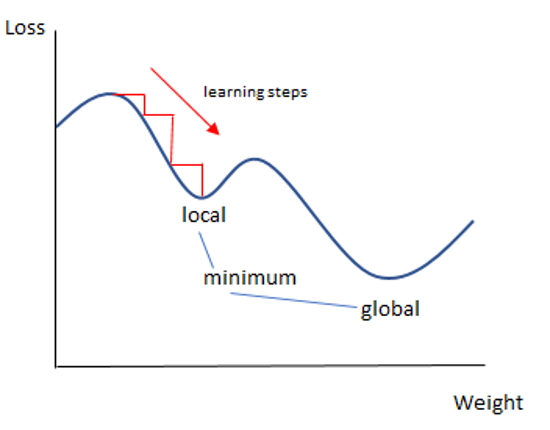

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Species 열을 제외한 나머지 5개는 input data, Species 열은 target data 설정

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
# scikit-learn의 train_test_split() 함수를 이용해 train set, target set로 분류

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
# train set 와 test set 의 특성을 표준화 전처리! (꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야함!!)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

*   이전과 동일 (넘파이 배열 준비, 표준화(스케일 맞추기) )
---
***Stocastic Gradient Descent 패키지 실행***

*   SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정함
*   loss는 손실 함수의 종류를 지정 --> ***loss = 'log' 로 지정***
*   max_iter는 수행할 epoch 횟수를 지정 --> ***10으로 지정하여 전체 train set를 10회 반복***

In [6]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


*   warning이 뜨는 이유는 max_iter 파라미터가 너무 적게 설정 되어 있어 epoch 횟수가 낮아 score가 낮게 나와서 알려주는 것
*   ***정확도가 낮음! --> epoch가 10으로는 부족함!***

In [7]:
# SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 훈련

sc.partial_fit(train_scaled, train_target)      # 모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


*   정확도가 향상 되었음!
*   하지만 무작정 많이 반복할 수는 없고 ***기준이 필요함!***
---

# ***epoch 와 over/under fitting***

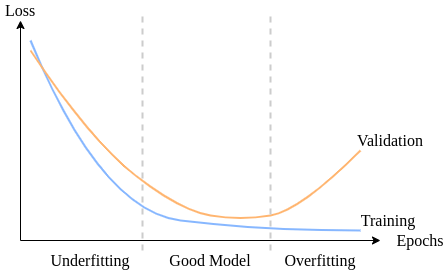

*   train set의 점수는 epoch가 진행될수록 꾸준히 증가하지만 test set (Validation set) 점수는 어느 순간 감소함
*   이 지점이 모델이 과대적합되기 시작하는 지점임
*   과대적합이 시작하기 전, 훈련을 멈추는 것을 ***조기 종료(early stopping)이라 함***

In [10]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss', random_state=42)
train_score=[]                       # 점수를 기록하기 위해 2개의 빈 리스트 준비
test_score=[]
classes = np.unique(train_target)            # np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만듦

In [13]:
for _ in range(0, 300):                                                # 파이썬의 _ 는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용함
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

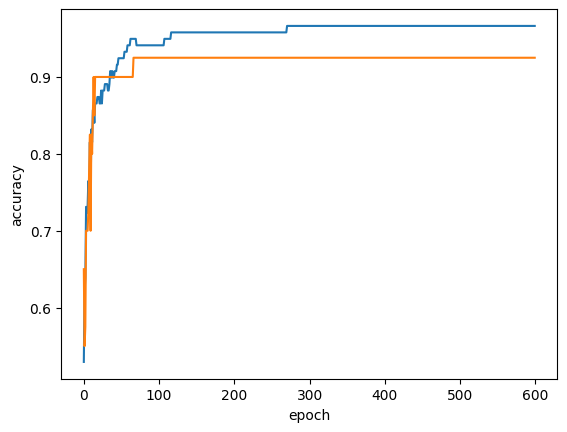

In [14]:
# 300번의 epoch 동안 기록한 train set와 test set의 점수의 그래프

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

*   100번째 epoch부터 train set와 test set의 점수가 조금씩 벌어지고 있음
*   epoch 초기에는 과소적합되어 train set와 test set의 점수가 낮음
*   ***즉, 이 모델의 경우 100번째 epoch가 적절한 반복 횟수로 보임***

In [17]:
# epoch를 100으로 설정후 model을 다시 훈련

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)     # tol 매개변수는 일정 epoch동안 성능이 향상되지 않으면 훈련을 멈추는 최솟값을 지정함
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [18]:
# 손실함수를 hinge loss (support vector machine) 으로 적용

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
